# ✅ 사본을 만들어 과제를 수행해주세요.

본 실습은 빈칸을 채워 코드를 완성시키는 문제와 주관식 답변 문제로 이루어져 있습니다.
실습 관련한 질문은 언제든 편하게 해주세요.

# 💡 ML 과제: 선형 회귀 모델 학습

실습 목표

1. 선형 회귀 모델(Ridge)을 정의하고 학습하는 방법을 이해합니다.

2. GridSearchCV를 활용하여 하이퍼파라미터를 탐색하는 방법을 배웁니다.

3. 예측 결과에 대한 평균제곱오차(MSE)와 결정계수(R²)를 계산하여 모델 성능을 평가합니다.



**0. Import**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression

**1. 데이터 생성**

In [ ]:
X, y = make_regression(n_samples=200, n_features=5, noise=15, random_state=42)

df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

**2. Train-test split**

train : test = 0.8:0.2로 분리될 수 있도록 빈칸을 채워 코드를 완성해주세요.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.2 , random_state=42
)

**3. 모델 정의**

In [ ]:
ridge = Ridge()

**4. Grid Search (하이퍼파라미터 튜닝)**

❓ 빈칸을 채워 코드를 완성하고 각 하이퍼파라미터들이 의미하는 것이 무엇인지 작성해주세요.

참고: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

답변:

In [ ]:
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5
)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error')

**5. 최적 모델 평가**

빈칸을 채워 코드를 완성해주세요.

In [ ]:
print("최적의 하이퍼파라미터:", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test) # 예측 수행

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))

최적의 하이퍼파라미터: {'alpha': 0.1}
MSE: 191.13669584366227
R² score: 0.9780011857389037


❓ 모델의 성능을 MSE값과 R²을 바탕으로 평가해주세요.

답변: 모델 성능 평가 결과, MSE는 약 191.1367로 이는 타깃 값에 따라 상대적인 값이고 결정계수(R²)는 약 0.9780로 매우 높은 수치이다. 이는 모델이 데이터 변동의 약 97.8%를 설명함을 의미한다.

❓ Grid Search이외에 다른 하이퍼파라미터 튜닝 기법으로는 어떤게 있는지 설명해주세요.

답변: 첫 번째로 랜덤 서치(Random Search) 기법이 있다. 이는 하이퍼파라미터 공간에서 무작위로 일부 조합을 샘플링해 실험하는 방법으로, 최적의 조합을 놓칠 가능성은 있으나 전체 공간을 모두 탐색하지 않고도 적은 시도만으로 준수한 성능을 확보할 수 있다. 특히 파라미터가 많거나 연속적인 값일 때 효율적이며, 제한된 시간 안에 좋은 결과를 얻기에 적합하다.

또 다른 방법으로는, 가우시안 프로세스와 같은 사전 정보를 바탕으로 최적 하이퍼파라미터 값을 확률적으로 추정하는 베이지안 최적화(Bayesian Optimization) 기법이 있다. 이 방법은 그리드 서치나 랜덤 서치보다 훨씬 빠르고 효율적으로 최적값에 접근할 수 있어, 자원과 시간이 제한된 상황에서 유용하다.

# 💡 DL 과제: Fashion-MNIST CNN 모델 구현

실습 목표

1. Fashion-MNIST 데이터셋의 특징을 이해하고 구조를 파악합니다.

2. CNN 모델을 직접 구현하면서 합성곱 연산 및 출력 크기 계산을 실습합니다.

3. Stride, padding, 필터 개수 등 하이퍼파라미터가 출력 형태에 미치는 영향을 학습합니다.

4. Batch Normalization을 적용하는 방법을 실습합니다.

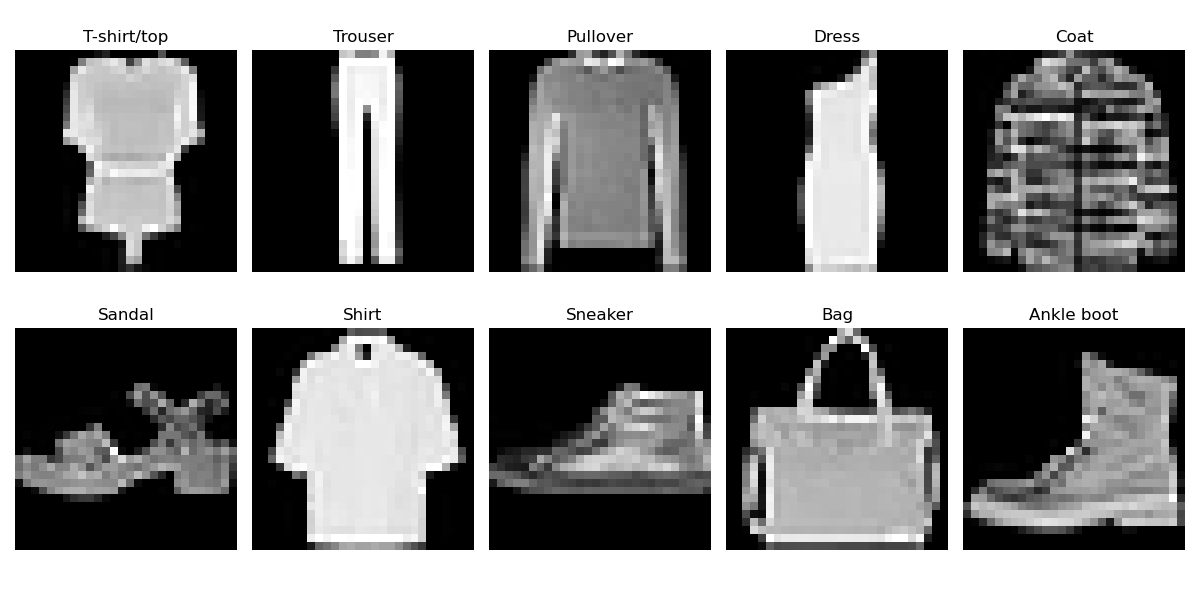

✅ Fashion-MNIST란?Fashion-MNIST는 Zalando에서 공개한 의류 이미지 데이터셋으로, 기존 MNIST 손글씨 숫자 데이터셋의 대체를 목표로 개발되었습니다. 총 10개 카테고리(티셔츠, 바지, 코트 등)로 구성된 흑백 이미지(28x28 픽셀)로 이루어져 있으며, 딥러닝 모델의 성능을 테스트하기 위한 벤치마크 데이터로 널리 사용되고 있습니다.


✅모델을 빠르게 학습하기 위해 GPU를 사용하는 것이 좋습니다. Google Colab에서는 다음과 같이 설정할 수 있습니다.

메뉴 → 런타임 → 런타임 유형 변경 → 하드웨어 가속기: GPU 선택 → 저장

**0. Import**

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim

**1. 데이터 전처리**

In [3]:
# 이미지 데이터 전처리
transform = transforms.Compose([

    # PIL 이미지나 numpy 배열을 PyTorch 텐서로 변환
    # 픽셀 값이 원래 0부터 255까지 정수였던 것을 0부터 1까지의 실수 범위로 자동으로 스케일링
    transforms.ToTensor(),

    # 픽셀 값을 평균 = 0.5, 표준편차 = 0.5로 정규화
    transforms.Normalize((0.5,), (0.5,))
])

# 학습용/테스트용 데이터셋을 불러온 후 전처리
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# 학습 데이터를 배치 단위로 묶고 셔플을 적용하는 DataLoader 생성
# batch_size=64: 한 번에 모델에 넣을 데이터 개수를 64개로 설정
# shuffle=True: 매 에폭마다 데이터를 랜덤하게 섞어서 학습 효과를 높임
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# shuffle=False: 평가할 때는 데이터 순서를 섞지 않음
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

100%|██████████| 26.4M/26.4M [00:01<00:00, 13.8MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 205kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.81MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.3MB/s]


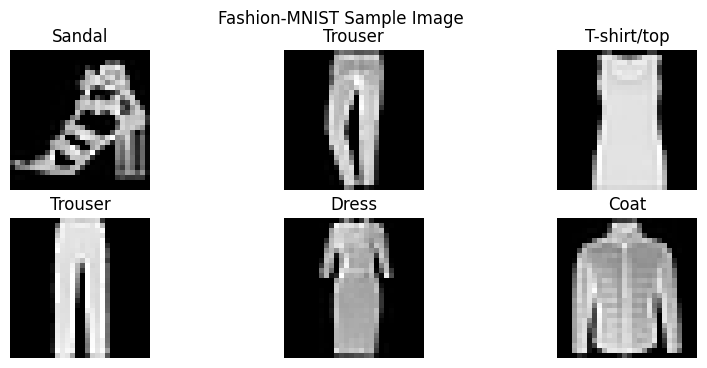

In [4]:
# 이미지 확인
# 숫자 레이블(0~9)을 사람이 이해할 수 있는 의류 클래스 이름으로 바꾸는 리스트
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 샘플 이미지 6개 시각화
# 전체 학습 데이터를 배치 단위로 묶은 데이터 로더에서 하나의 배치씩 꺼냄
examples = iter(train_loader)       # train_loader → 배치 이터레이터로 바꿈
images, labels = next(examples)     # 첫 번째 배치를 꺼내어 images에는 배치크기(64)만큼 이미지 저장, labels에는 정답 레이블(0~9)

plt.figure(figsize=(10,4))
for i in range(6):

    # 2행 3열 중에서 i+1번째 위치에 이미지 그림
    plt.subplot(2,3,i+1)
    plt.imshow(images[i][0], cmap='gray')
    plt.title(classes[labels[i]])
    plt.axis('off')
plt.suptitle('Fashion-MNIST Sample Image')
plt.show()

**2. CNN 모델 설계**

아래 조건에 맞게 코드를 완성시켜주세요.

        # Conv Layer 1: 입력 채널 1, 출력 채널 16, 필터 3x3, stride=1, padding=1
        # Conv Layer 2: 입력 16, 출력 32, 필터 3x3, stride=2, padding=1
        # Conv Layer 3: 입력 32, 출력 64, 필터 3x3, stride=2, padding=1
        # 각각의 Conv Layer 이후 Batchnorm 을 적용하고 activation function으로 ReLU를 사용
        # 출력 층(FC) 뉴런의 개수는 10개 (클래스가 10개이기 때문)
        # optimizer는 Adam을 사용

In [5]:
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()

        # BatchNorm(채널 수): 2차원 배치 정규화 레이어
        # 출력된 feature map에 대해 채널별로 정규화
        # feature map(output)shape : [batch, 16, 28, 28]
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)

        # feature map(output)shape : [batch, 32, 14, 14]
        self.conv2 = nn.Conv2d(16, 32, 3, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(32)

        # feature map(output)shape : [batch, 64, 7, 7]
        self.conv3 = nn.Conv2d(32, 64, 3, stride=2, padding=1)
        self.bn3 = nn.BatchNorm2d(64)

        # Flatten + FC(Fully Connected)층
        self.fc1 = nn.Linear(64*7*7, 128)   # (64*7*7)차원에서 128차원으로 축소
        self.fc2 = nn.Linear(128, 10)       # 128차원에서 10차원으로 축소 (클래스 개수만큼 출력)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))   # Conv1 → BN1 → ReLU (비선형성 부여)
        x = F.relu(self.bn2(self.conv2(x)))   # Conv2 → BN2 → ReLU
        x = F.relu(self.bn3(self.conv3(x)))   # Conv3 → BN3 → ReLU

        # FC층에 넣기 위해 [batch_size, 3136] 형태의 2차원 텐서로 바꿈
        x = x.view(x.size(0), -1)             # Flatten (배치당 64×7×7 → 3136 벡터)

        x = F.relu(self.fc1(x))               # Fully Connected (3136 → 128) + ReLU
        x = self.fc2(x)                       # Fully Connected (128 → 10), 출력: 10개 클래스의 로짓
        return x

**3. 학습 설정**

적절한 손실함수와 조건에 맞는 optimizer를 사용해주세요.

In [6]:
model = FashionCNN()
criterion = nn.CrossEntropyLoss()                      # 손실함수
optimizer = optim.Adam(model.parameters(), lr=0.001)   # Optimizer (모델 파라미터 업데이트)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

FashionCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [7]:
# 모델 학습 함수
def train(model, loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0

    # 데이터 로더에서 배치 단위의 이미지와 레이블을에 대해
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()                # 이전 배치에서 계산된 기울기 초기화
        outputs = model(images)              # 예측값 계산
        loss = criterion(outputs, labels)    # 손실 계산
        loss.backward()                      # 역전파 수행 (각 가중치에 대한 기울기 계산)
        optimizer.step()                     # 가중치 업데이트

        running_loss += loss.item()          # 배치의 손실값 누적

    return running_loss / len(loader)        # 전체 학습 데이터에 대한 평균 손실값 반환

In [9]:
# 모델 평가 함수
def evaluate(model, loader, device):
    model.eval()
    correct = 0
    total = 0

    # 기울기 계산 비활성화 (평가 시에는 역전파 수행하지 않음)
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)                        # 예측값 계산
            _, predicted = torch.max(outputs.data, 1)      # 각 샘플에서 예측한 클래스(가장 높은 확률의 인덱스) 추출
            total += labels.size(0)                        # 전체 데이터 수 누적
            correct += (predicted == labels).sum().item()  # 정답과 일치한 예측 수 누적

    return correct / total       # 정확도 계산 (맞게 예측한 비율)

**4. 모델 학습**

In [10]:
# 모델 10번 반복 학습
num_epochs = 10

for epoch in range(num_epochs):

    # 모델을 학습하여 학습 데이터에 대한 평균 손실값 반환
    train_loss = train(model, train_loader, optimizer, criterion, device)

    # 모델을 평가하여 테스트 데이터에 대한 정확도 반환
    test_acc = evaluate(model, test_loader, device)

    # 에폭의 손실과 정확도 출력
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}, Test Accuracy: {test_acc:.4f}")

Epoch 1/10, Loss: 0.3690, Test Accuracy: 0.8933
Epoch 2/10, Loss: 0.2442, Test Accuracy: 0.9019
Epoch 3/10, Loss: 0.1960, Test Accuracy: 0.9100
Epoch 4/10, Loss: 0.1632, Test Accuracy: 0.9078
Epoch 5/10, Loss: 0.1346, Test Accuracy: 0.9185
Epoch 6/10, Loss: 0.1091, Test Accuracy: 0.9208
Epoch 7/10, Loss: 0.0847, Test Accuracy: 0.9217
Epoch 8/10, Loss: 0.0717, Test Accuracy: 0.9125
Epoch 9/10, Loss: 0.0562, Test Accuracy: 0.9118
Epoch 10/10, Loss: 0.0454, Test Accuracy: 0.9140


❓ **최종 Accuracy는?**

답변: 최종 Accuracy는 0.9140 이다. 10번째 epoch에서 모델이 테스트 데이터에 대해 91.40%의 정확도로 분류하였음을 의미한다.

❓ **CNN의 구조를 간략하게 설명하세요.**

답변: CNN(Convolutional Neural Network)은 주로 이미지 데이터를 처리할 수 있는 신경망 구조이다. 합성곱 층에서 합성곱 필터를 통해 이미지의 특징을 추출하고, 풀링 층에서는 피처 맵의 크기를 압축하여 계산량을 감소시키며, 완전연결층에서는 추출된 특징을 바탕으로 최종 분류를 수행한다.